In [1]:
!python -m pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 877.6/877.6 kB 26.0 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="HMDxCMgxf0KzCReeuRrQ")
project = rf.workspace("unodetection").project("cartes-annotees")
version = project.version(4)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.7 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to cartes-annotées-4 in yolov8:: 100%|██████████| 4202/4202 [00:00<00:00, 4716.01it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.23 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.4/112.6 GB disk)


In [5]:
from ultralytics import YOLO
from IPython.display import display, Image

In [6]:
!yolo task=detect mode=train model=yolov8s.pt data="/content/drive/MyDrive/Again Push/Uno_Card_detection/UnoCardModel_v3.v3i.yolov8/data.yaml" epochs=40 imgsz=800 plots=True

100% 21.5M/21.5M [00:00<00:00, 90.4MB/s]
Ultralytics 8.3.23 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/Again Push/Uno_Card_detection/UnoCardModel_v3.v3i.yolov8/data.yaml, epochs=40, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_fram

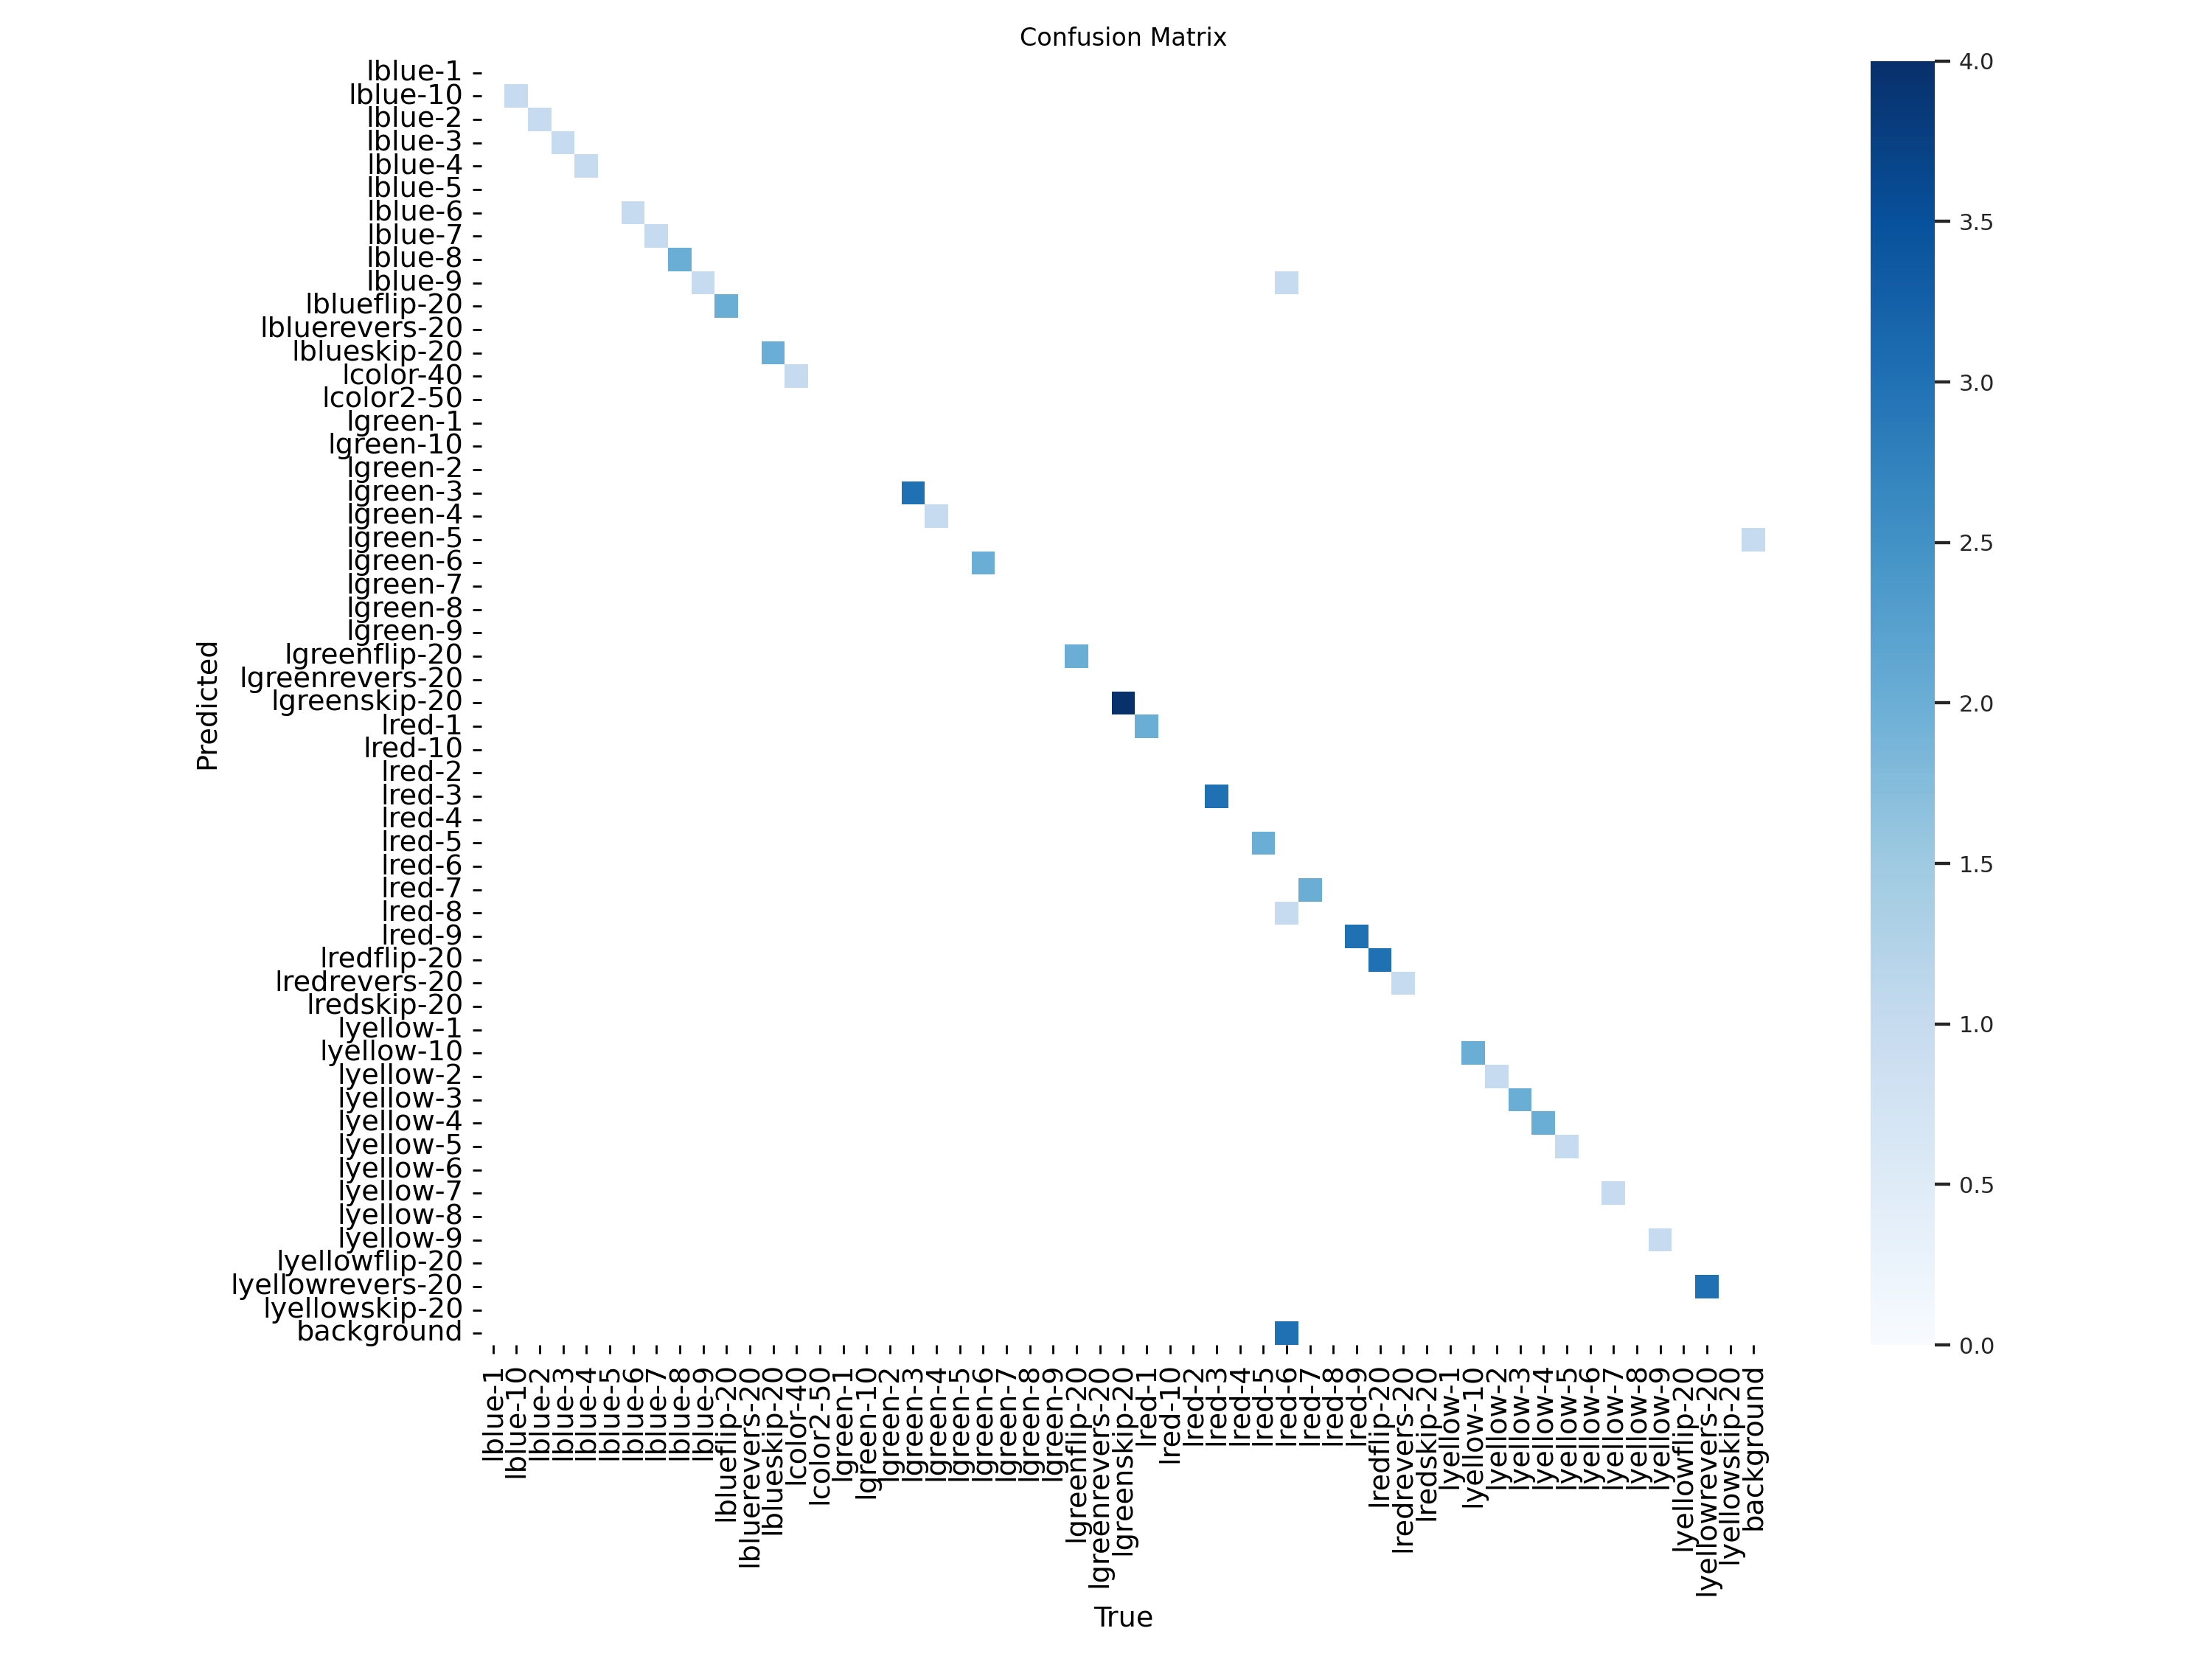

In [7]:
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=600)

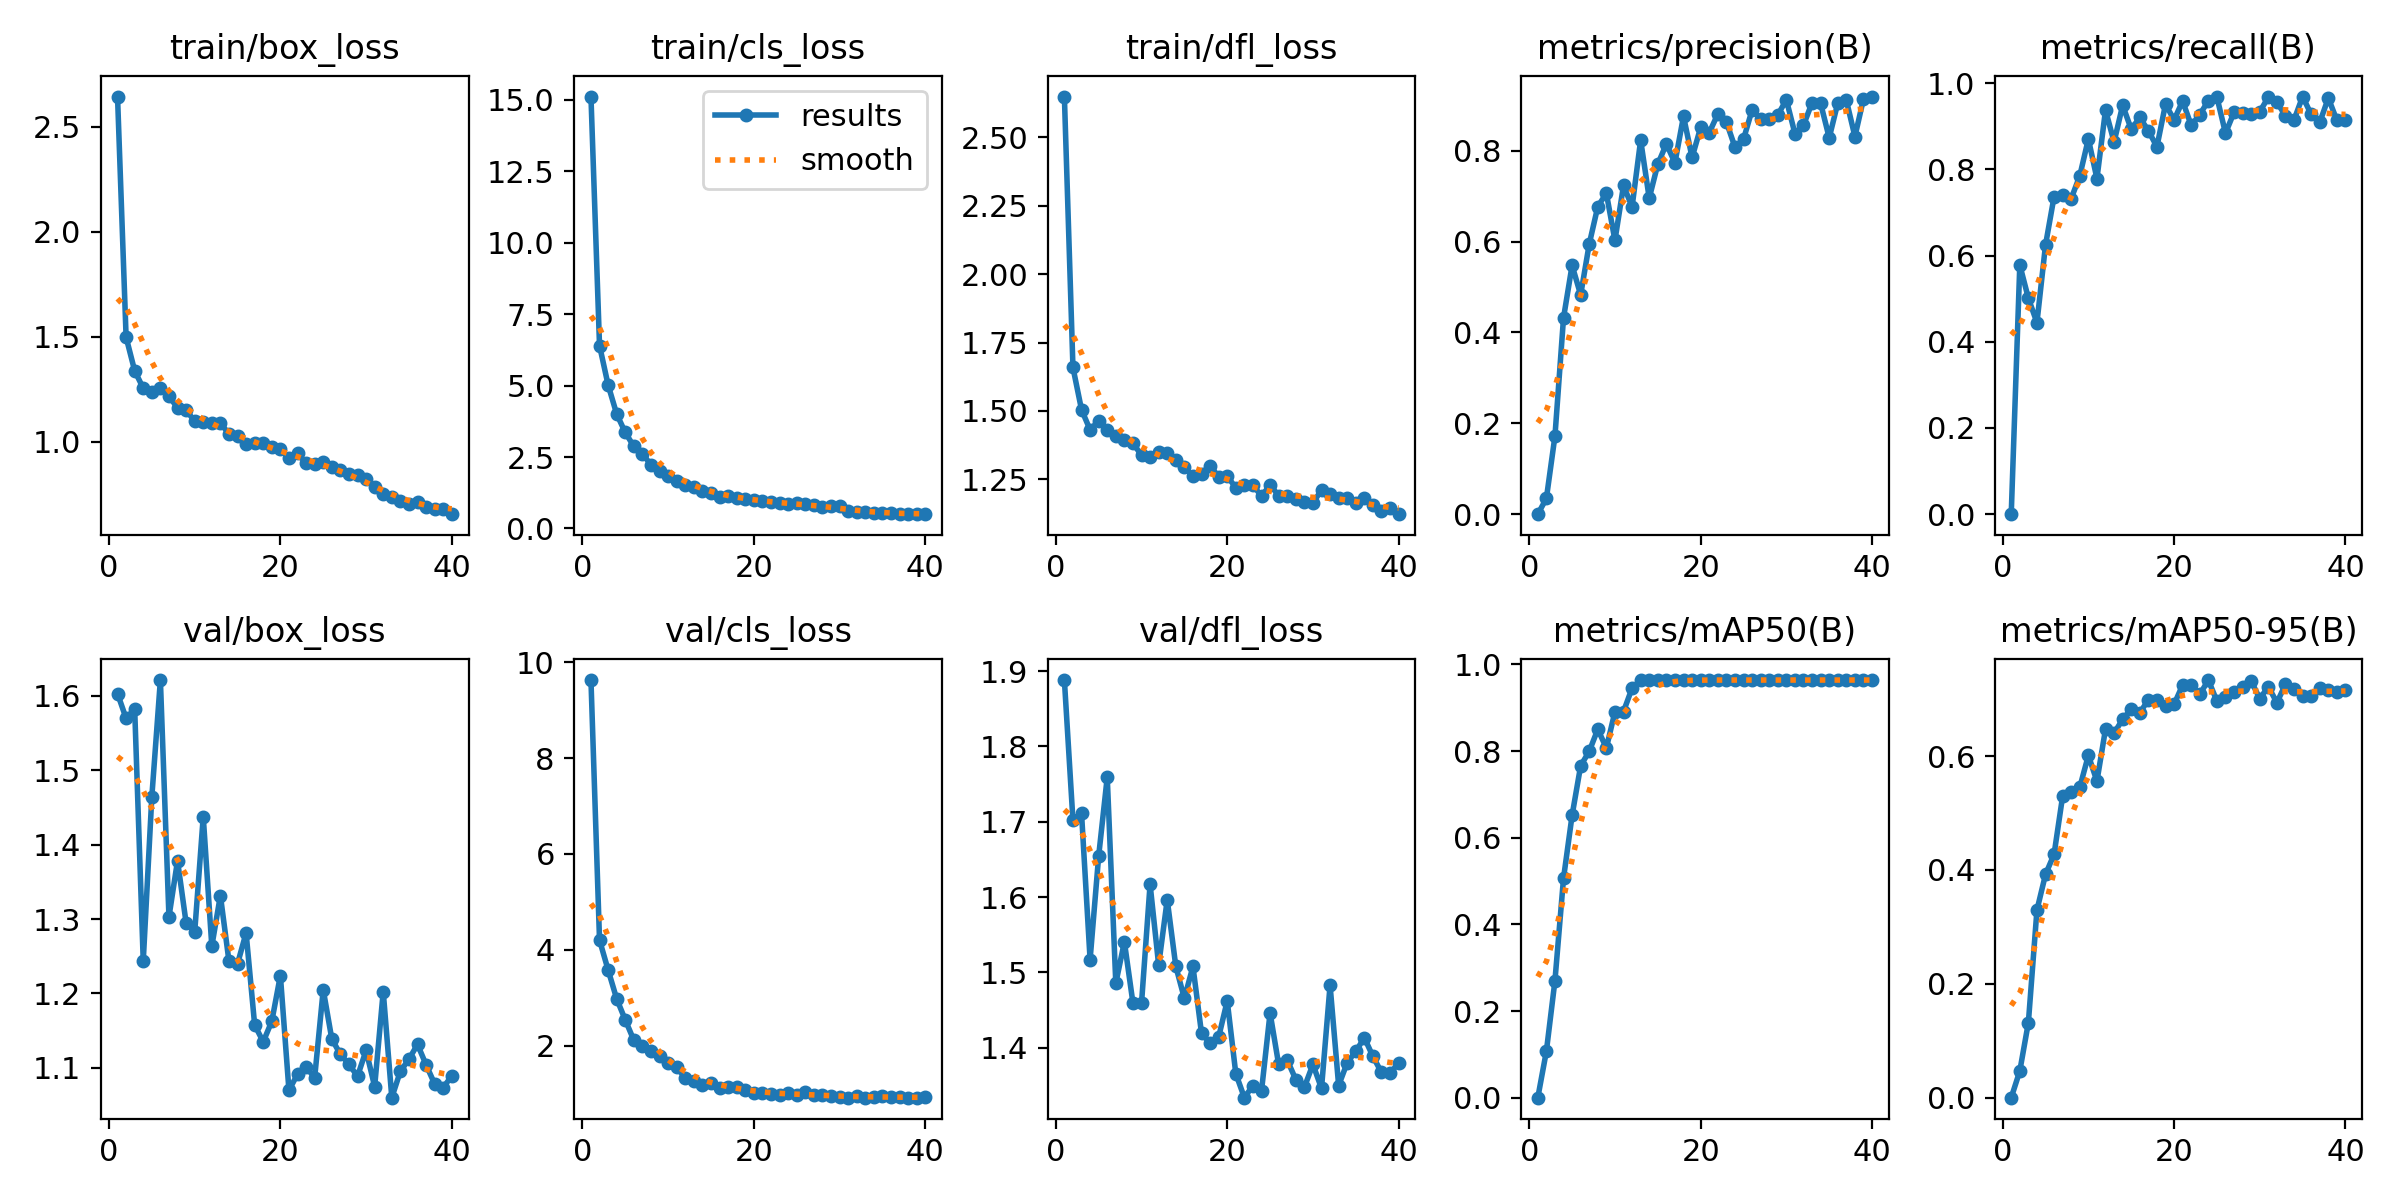

In [8]:
Image(filename=f'/content/runs/detect/train/results.png', width=600)

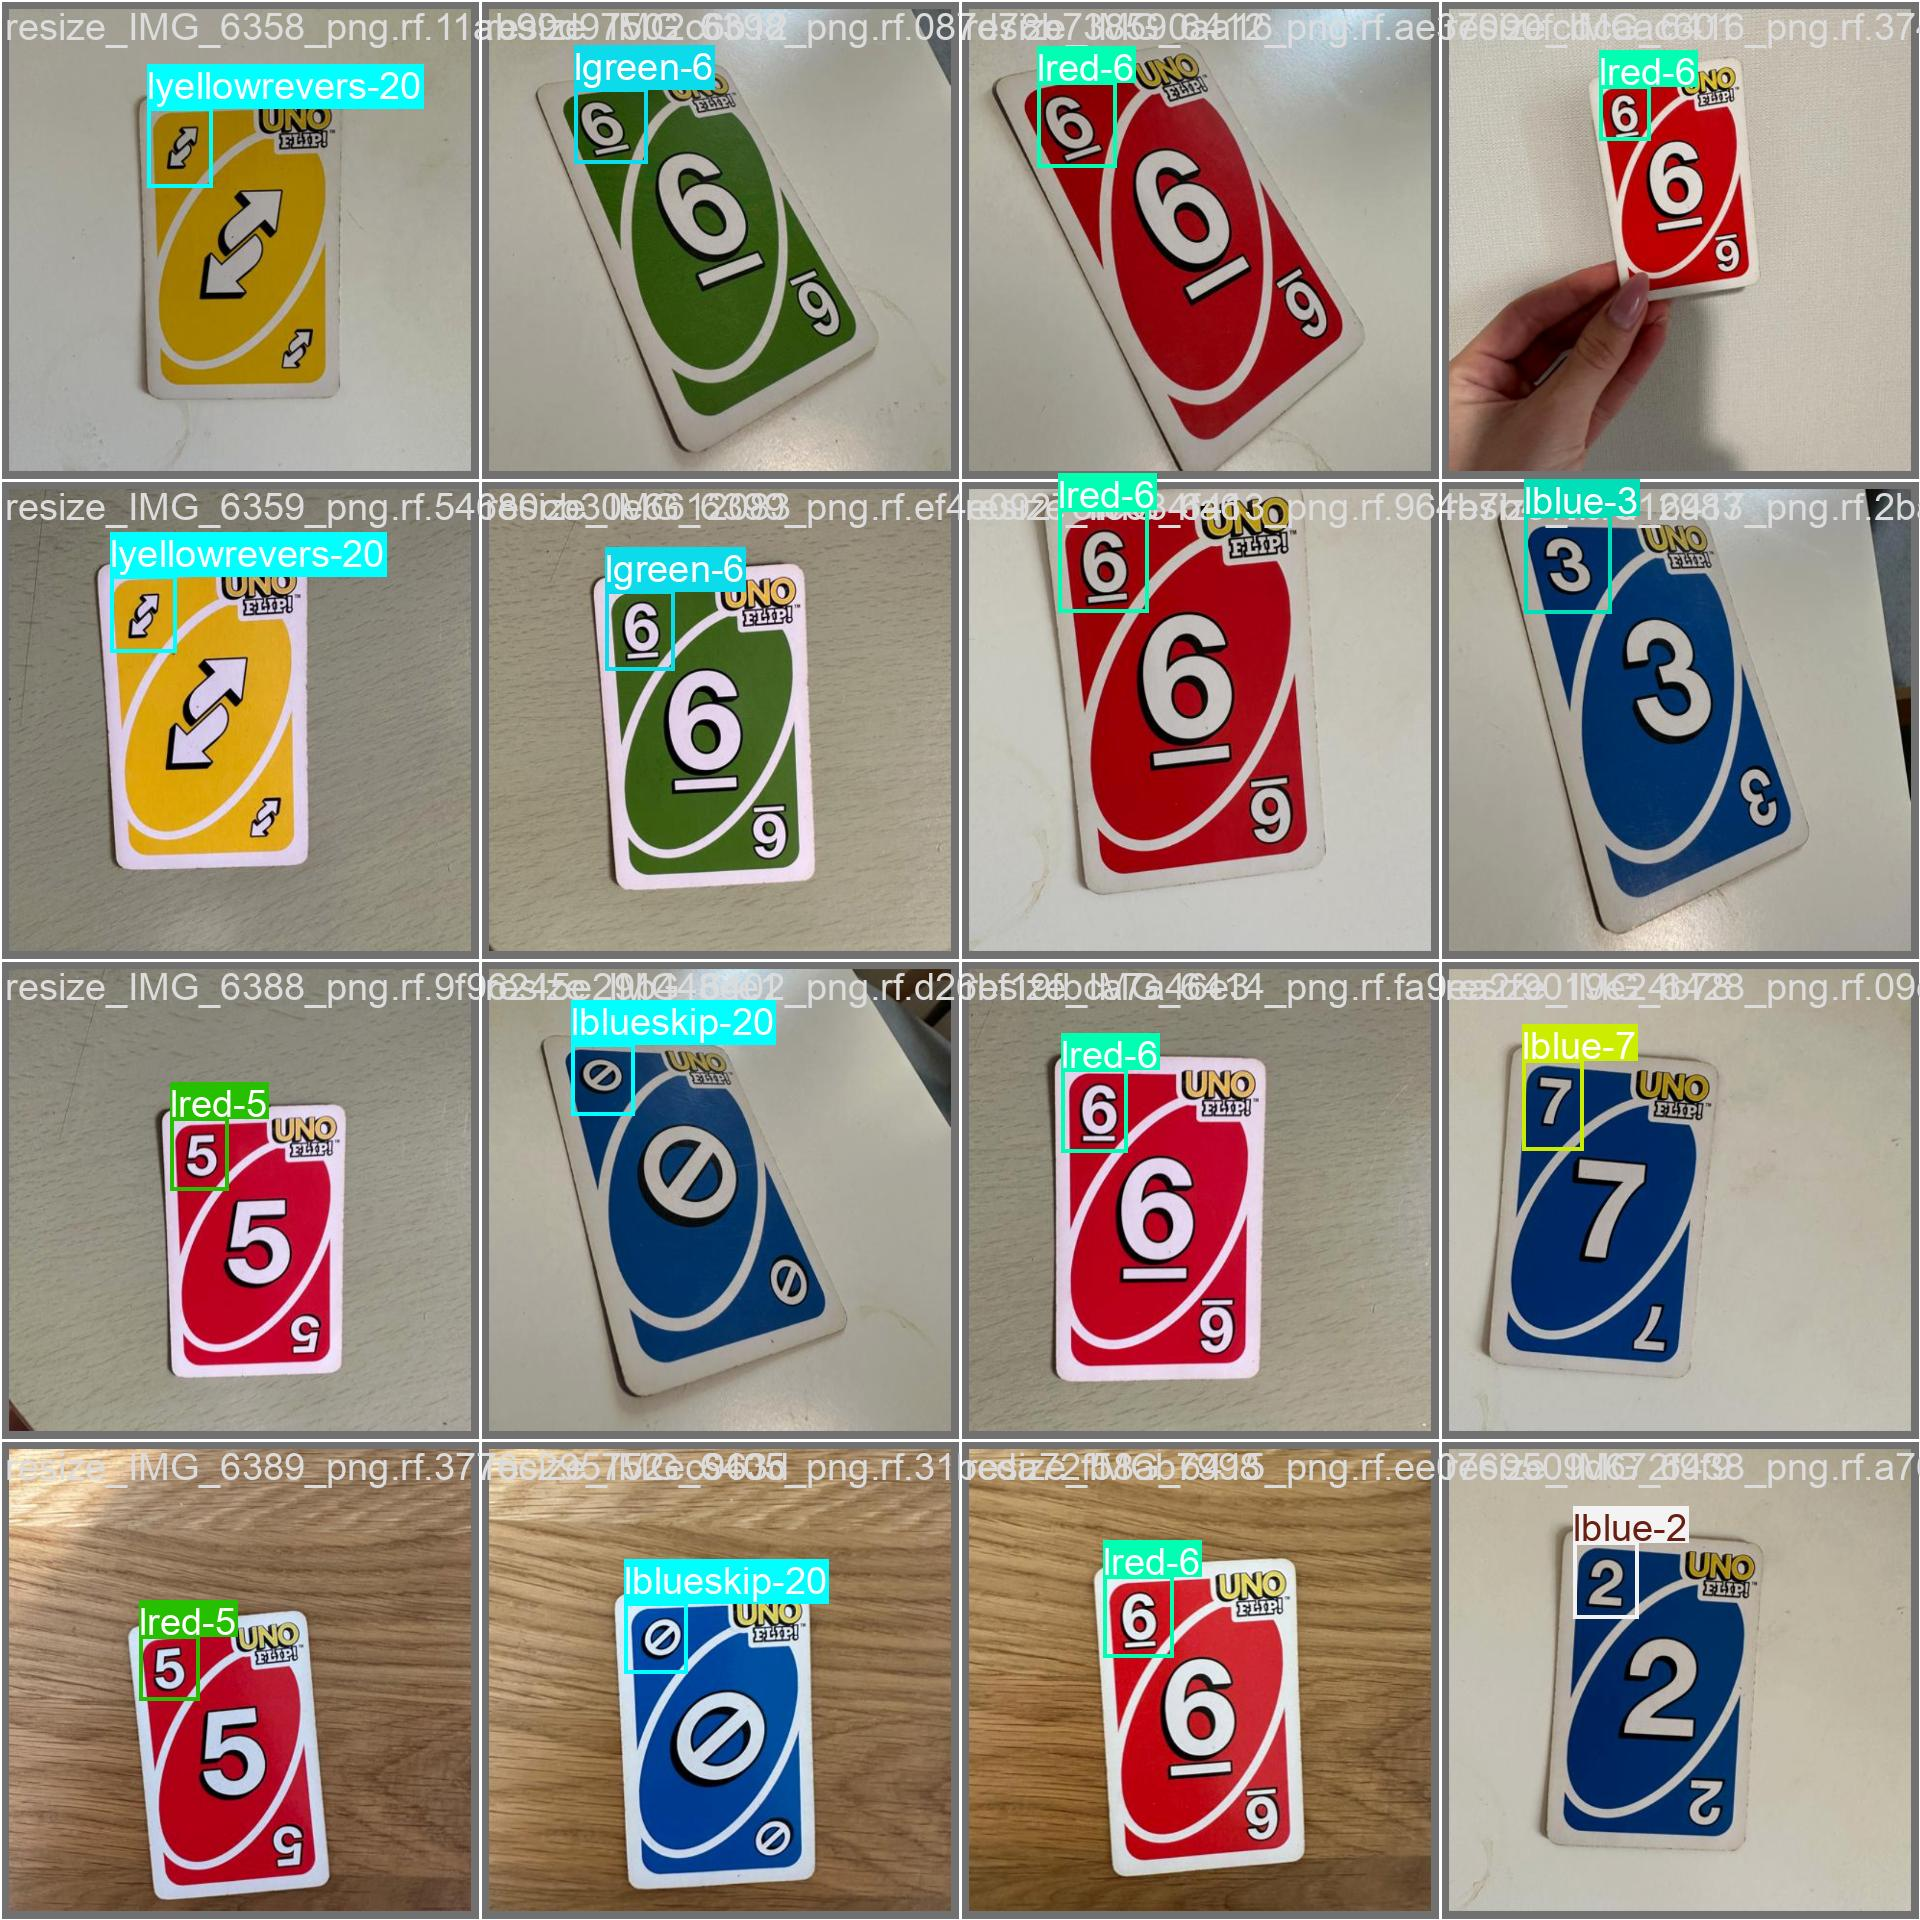

In [9]:
Image(filename=f'/content/runs/detect/train/val_batch0_labels.jpg', width=600)

In [10]:
!yolo task=detect mode=val model="/content/runs/detect/train/weights/best.pt" data="/content/drive/MyDrive/Again Push/Uno_Card_detection/UnoCardModel_v3.v3i.yolov8/data.yaml"

Ultralytics 8.3.23 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,146,482 parameters, 0 gradients, 28.6 GFLOPs
val: Scanning /content/drive/MyDrive/Again Push/Uno_Card_detection/UnoCardModel_v3.v3i.yolov8/valid/labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100% 60/60 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:03<00:00,  1.10it/s]
                   all         60         60      0.808      0.959      0.964      0.736
              lblue-10          1          1      0.745          1      0.995      0.796
               lblue-2          1          1      0.728          1      0.995      0.796
               lblue-3          1          1      0.946          1      0.995      0.697
               lblue-4          1          1      0.817          1      0.995      0.895
               lblue-6          1          1      0.714          1      0.995      0.

In [11]:
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf=0.25 source="/content/drive/MyDrive/Again Push/Uno_Card_detection/UnoCardModel_v3.v3i.yolov8/test/images" save=True

Ultralytics 8.3.23 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,146,482 parameters, 0 gradients, 28.6 GFLOPs

image 1/134 /content/drive/MyDrive/Again Push/Uno_Card_detection/UnoCardModel_v3.v3i.yolov8/test/images/IMG_5412_png.rf.b12fd116aec17c87d337ae3ea068def0.jpg: 800x800 1 lredskip-20, 1 lyellow-8, 23.2ms
image 2/134 /content/drive/MyDrive/Again Push/Uno_Card_detection/UnoCardModel_v3.v3i.yolov8/test/images/IMG_5413_png.rf.37b7a29e11f33bece301f38536f32364.jpg: 800x800 1 lyellow-7, 23.1ms
image 3/134 /content/drive/MyDrive/Again Push/Uno_Card_detection/UnoCardModel_v3.v3i.yolov8/test/images/IMG_5414_png.rf.cb397b6436a073423729a5c9cd4f9576.jpg: 800x800 1 lred-7, 23.2ms
image 4/134 /content/drive/MyDrive/Again Push/Uno_Card_detection/UnoCardModel_v3.v3i.yolov8/test/images/IMG_5415_png.rf.d571b28940755910815070ab593f5ae0.jpg: 800x800 1 lredrevers-20, 1 lyellow-9, 23.0ms
image 5/134 /content/drive/MyDrive/Again Push/Uno_Card_detect

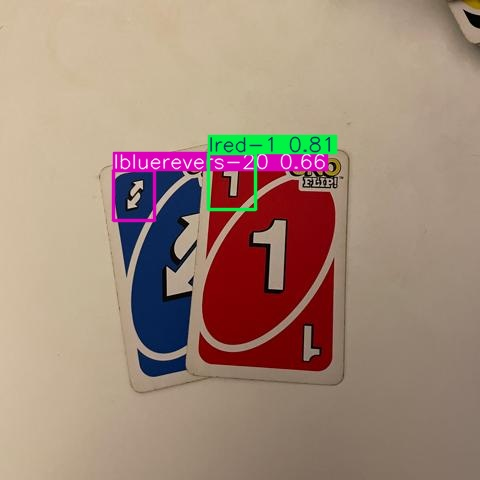

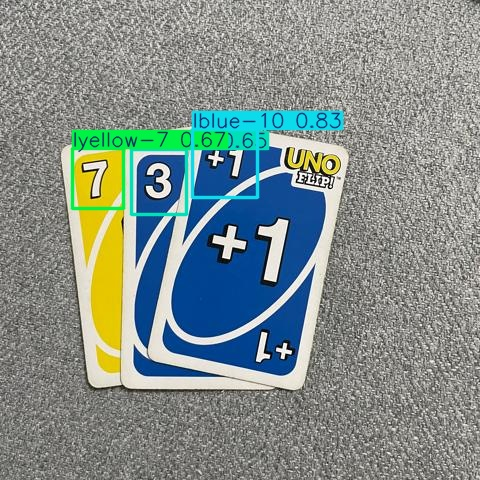

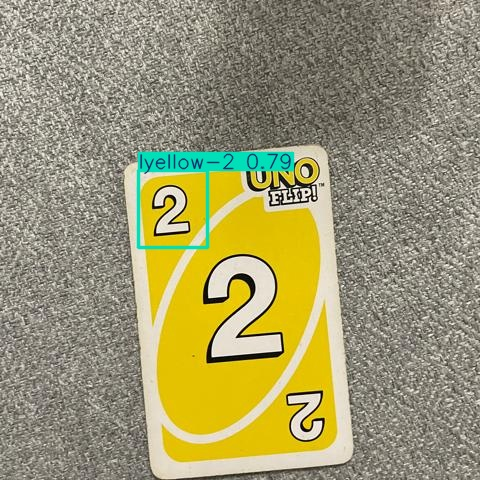

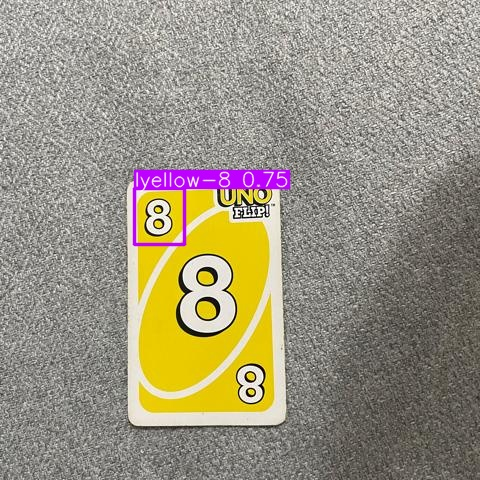

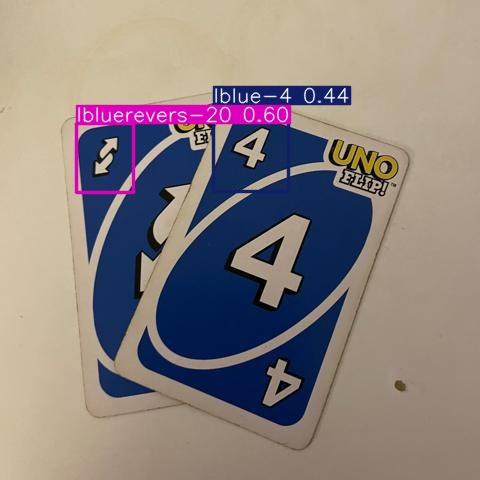

In [12]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg')[:5]:
      display(Image(filename=image_path, width=400))
      print("\n")

In [13]:
folder_path = '/content/drive/My Drive/ColabNewModelResults/'
import os
os.makedirs(folder_path, exist_ok=True)

In [14]:
import shutil

# Replace 'my_folder' with the name of your folder
shutil.copytree('/content/runs', folder_path + 'runs')

'/content/drive/My Drive/ColabNewModelResults/runs'